In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
migraine_df = pd.read_csv('migraine_treatment.csv')
migraine_df.head()

,id,time,dos,hatype,age,airq,medication,headache,sex
0,1,-11,753,Aura,30,9.0,continuing,yes,female
1,1,-10,754,Aura,30,7.0,continuing,yes,female
2,1,-9,755,Aura,30,10.0,continuing,yes,female
3,1,-8,756,Aura,30,13.0,continuing,yes,female
4,1,-7,757,Aura,30,18.0,continuing,yes,female


In [3]:
migraine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4152 entries, 0 to 4151
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          4152 non-null   int64  
 1   time        4152 non-null   int64  
 2   dos         4152 non-null   int64  
 3   hatype      4152 non-null   object 
 4   age         4152 non-null   int64  
 5   airq        4152 non-null   float64
 6   medication  4152 non-null   object 
 7   headache    4152 non-null   object 
 8   sex         4152 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 292.1+ KB


In [4]:
# Number of unique patients
migraine_df['id'].nunique()

133

In [5]:
# Check missing values
migraine_df.isnull().sum()

id            0
time          0
dos           0
hatype        0
age           0
airq          0
medication    0
headache      0
sex           0
dtype: int64

In [6]:
# Get one row per unique individual
unique_patients = migraine_df.drop_duplicates(subset='id')

In [7]:
# Continuous variables summary statistics
migraine_df[['dos','age','airq']].describe()

,dos,age,airq
count,4152.000000,4152.000000,4152.000000
mean,646.705925,42.363921,24.826012
std,335.770123,11.201244,9.514274
min,98.000000,18.000000,3.000000
25%,384.000000,33.000000,18.000000
50%,623.000000,44.000000,24.000000
75%,950.000000,50.000000,29.000000
max,1239.000000,66.000000,73.000000


In [24]:
unique_patients[['dos','age','airq']].describe()

,dos,age,airq
count,133.000000,133.000000,133.000000
mean,627.022556,42.157895,24.224060
std,325.934169,11.363046,9.949632
min,98.000000,18.000000,9.000000
25%,380.000000,33.000000,17.000000
50%,586.000000,44.000000,22.000000
75%,919.000000,50.000000,29.000000
max,1219.000000,66.000000,56.000000


In [8]:
# Frequency tables for categorical variables
print(unique_patients['hatype'].value_counts(), "\n")
print(unique_patients['medication'].value_counts(), "\n")
print(unique_patients['headache'].value_counts(), "\n")
print(unique_patients['sex'].value_counts(), "\n")

hatype
No Aura    65
Aura       56
Mixed      12
Name: count, dtype: int64 

medication
continuing    82
reduced       26
none          25
Name: count, dtype: int64 

headache
yes    105
no      28
Name: count, dtype: int64 

sex
female    113
male       20
Name: count, dtype: int64 



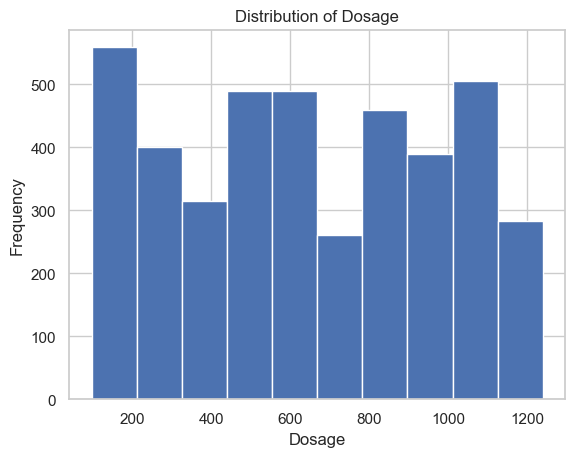

In [9]:
# Histograms for continuous variables
migraine_df['dos'].hist(bins=10)
plt.title('Distribution of Dosage')
plt.xlabel('Dosage')
plt.ylabel('Frequency')
plt.show()

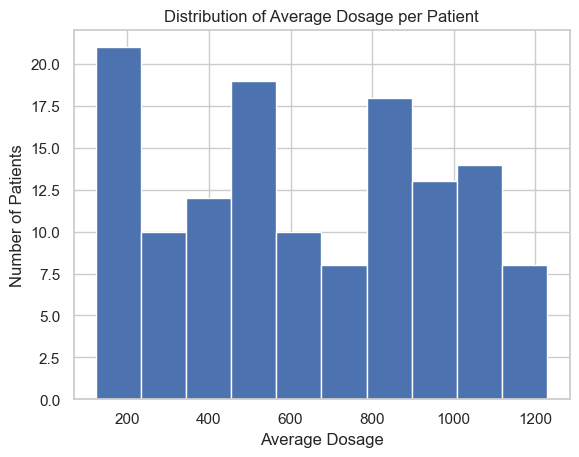

In [ ]:
# Compute mean dosage per unique patient
avg_dosage = migraine_df.groupby('id', as_index=False)['dos'].mean()

# Plot histogram of mean dosage
avg_dosage['dos'].hist(bins=10)
plt.title('Distribution of Average Dosage per Patient')
plt.xlabel('Average Dosage')
plt.ylabel('Number of Patients')
plt.show()

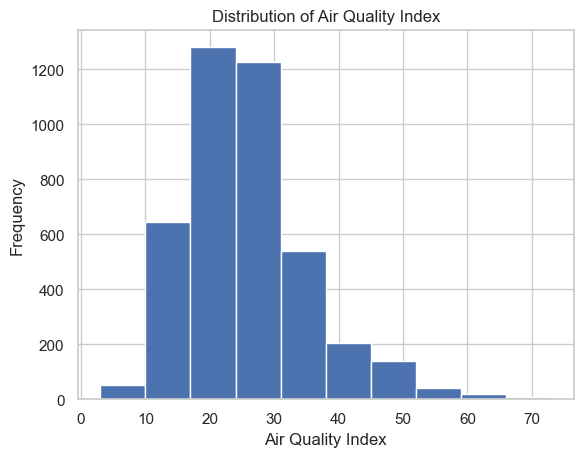

In [10]:
# Air Quality Index histogram
migraine_df['airq'].hist(bins=10)
plt.title('Distribution of Air Quality Index')
plt.xlabel('Air Quality Index')
plt.ylabel('Frequency')
plt.show()

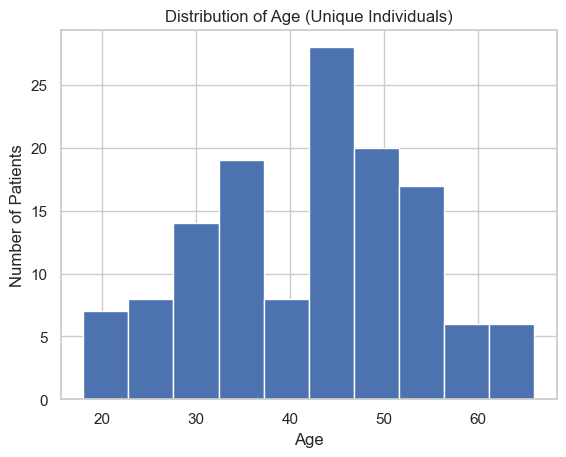

In [11]:
# Plot histogram for unique ages
unique_patients['age'].hist(bins=10)
plt.title('Distribution of Age (Unique Individuals)')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

In [22]:
# Headache incidence by sex
pd.crosstab(unique_patients['sex'], unique_patients['headache'])

headache,no,yes
sex,,
female,23,90
male,5,15


In [18]:
# Mean dosage by medication type
unique_patients.groupby('medication')['dos'].mean()

medication
continuing    640.50
none          622.36
reduced       589.00
Name: dos, dtype: float64

In [17]:
# Average air quality when headache=yes vs no
unique_patients.groupby('headache')['airq'].mean()

headache
no     25.335714
yes    23.927619
Name: airq, dtype: float64

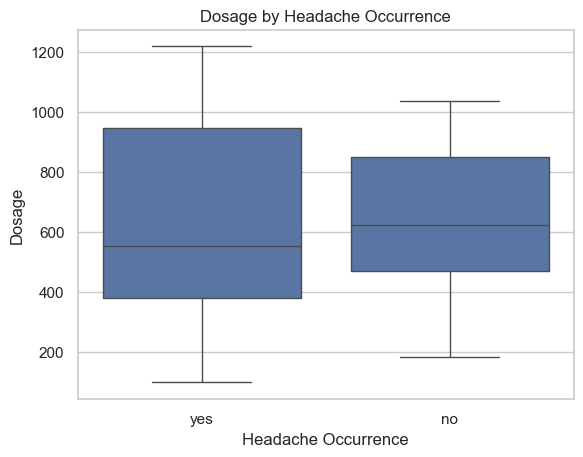

In [15]:
# Boxplot of dosage by headache occurrence
sns.boxplot(x='headache', y='dos', data=unique_patients)
plt.title('Dosage by Headache Occurrence')
plt.xlabel('Headache Occurrence')
plt.ylabel('Dosage')
plt.show()

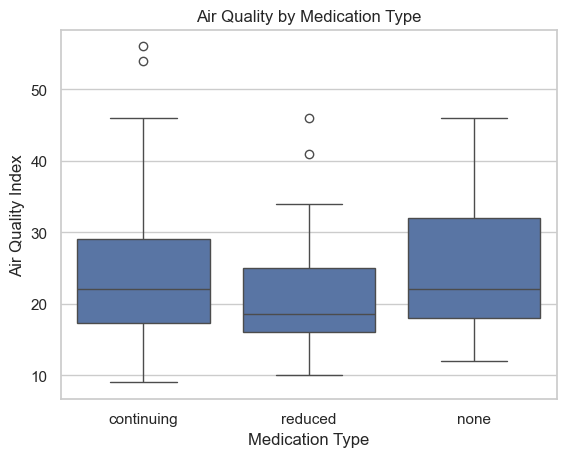

In [16]:
# Boxplot of air quality by medication type
sns.boxplot(x='medication', y='airq', data=unique_patients)
plt.title('Air Quality by Medication Type')
plt.xlabel('Medication Type')
plt.ylabel('Air Quality Index')
plt.show()

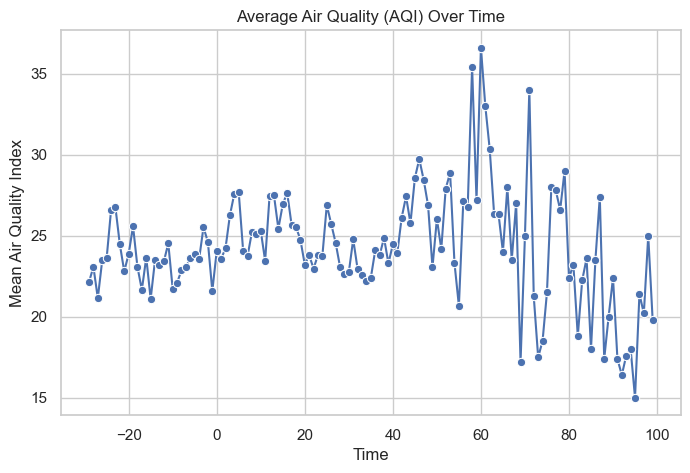

In [25]:
# Average air quality by time
airq_trend = migraine_df.groupby('time')['airq'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=airq_trend, x='time', y='airq', marker='o')
plt.title('Average Air Quality (AQI) Over Time')
plt.xlabel('Time')
plt.ylabel('Mean Air Quality Index')
plt.grid(True)
plt.show()

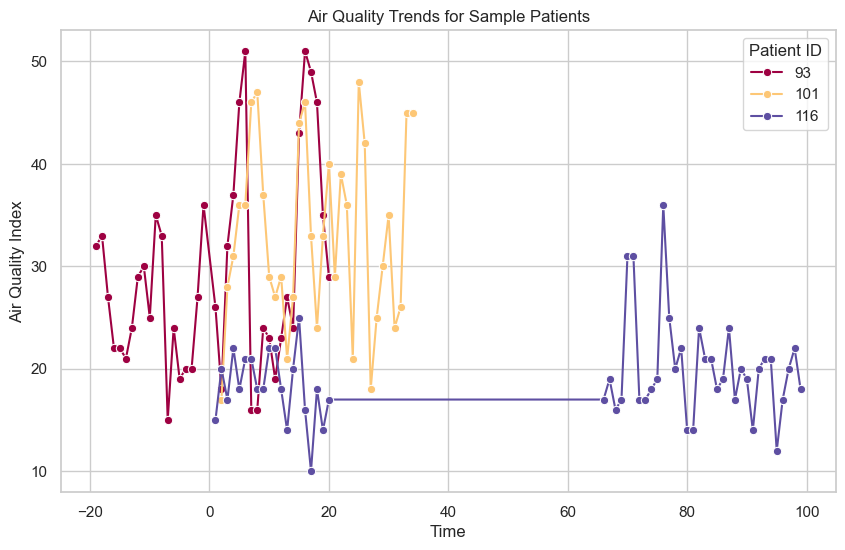

In [55]:
# Air quality trends for a few sample patients
sample_ids = migraine_df['id'].sample(3, random_state=16)
subset = migraine_df[migraine_df['id'].isin(sample_ids)]

plt.figure(figsize=(10,6))
sns.lineplot(data=subset, x='time', y='airq', hue='id', marker='o', palette='Spectral')
plt.title('Air Quality Trends for Sample Patients')
plt.xlabel('Time')
plt.ylabel('Air Quality Index')
plt.legend(title='Patient ID')
plt.show()
